**Step 1: Load and Explore the Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("sales_data.csv")
df.head()

,Customer_ID,Transaction_ID,Product_Category,Product_Name,Quantity_Purchased,Purchase_Amount,Discount_Percentage,Sales,Purchase_Date,Payment_Method,Customer_Age,Customer_Gender,Region
0,1,T00001,Headphones,Bose 700,1,1168.87,22.01,911.60,3/19/2024,Debit Card,64,Male,South America
1,2,T00002,Headphones,AirPods Pro,8,659.06,4.12,631.91,3/11/2023,Credit Card,31,Male,North America
2,3,T00003,TV,LG OLED,8,1776.47,0.57,1766.34,11/8/2024,PayPal,26,Male,Asia
3,4,T00004,Smartwatch,Apple Watch Series 7,7,1877.17,29.35,1326.22,9/8/2023,Credit Card,26,Female,Europe
4,5,T00005,Headphones,Bose 700,3,2257.90,17.05,1872.93,10/30/2023,Credit Card,57,Male,Europe


In [3]:
# Showing basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          1000 non-null   int64  
 1   Transaction_ID       1000 non-null   object 
 2   Product_Category     1000 non-null   object 
 3   Product_Name         1000 non-null   object 
 4   Quantity_Purchased   1000 non-null   int64  
 5   Purchase_Amount      1000 non-null   float64
 6   Discount_Percentage  1000 non-null   object 
 7   Sales                1000 non-null   float64
 8   Purchase_Date        1000 non-null   object 
 9   Payment_Method       1000 non-null   object 
 10  Customer_Age         1000 non-null   int64  
 11  Customer_Gender      1000 non-null   object 
 12  Region               1000 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 101.7+ KB


In [4]:
#getting an overview of numerical columns:
df.describe()

,Customer_ID,Quantity_Purchased,Purchase_Amount,Sales,Customer_Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5.487000,1542.229580,1309.095270,40.445000
std,288.819436,2.854817,849.568747,736.775731,14.951472
min,1.000000,1.000000,51.170000,41.740000,18.000000
25%,250.750000,3.000000,826.390000,700.525000,27.000000
50%,500.500000,6.000000,1507.150000,1279.450000,36.500000
75%,750.250000,8.000000,2274.905000,1938.957500,53.000000
max,1000.000000,10.000000,2999.570000,2924.090000,70.000000


**Step 2: Data Cleaning and preprocessing**

In [5]:
#checking missing values
df.isnull().sum()
#there are no missing values in our data

,0
Customer_ID,0
Transaction_ID,0
Product_Category,0
Product_Name,0
Quantity_Purchased,0
Purchase_Amount,0
Discount_Percentage,0
Sales,0
Purchase_Date,0
Payment_Method,0


In [6]:
#checking duplicates
df.duplicated().sum()
#no duplicated values

np.int64(0)

In [7]:
#Checking Incorrect Data Types
df.dtypes

,0
Customer_ID,int64
Transaction_ID,object
Product_Category,object
Product_Name,object
Quantity_Purchased,int64
Purchase_Amount,float64
Discount_Percentage,object
Sales,float64
Purchase_Date,object
Payment_Method,object


In [8]:
#Purchase_Date column converted to datetime
df['Purchase_Date']= pd.to_datetime(df['Purchase_Date'])
df.dtypes

,0
Customer_ID,int64
Transaction_ID,object
Product_Category,object
Product_Name,object
Quantity_Purchased,int64
Purchase_Amount,float64
Discount_Percentage,object
Sales,float64
Purchase_Date,datetime64[ns]
Payment_Method,object


In [9]:
#Extract Useful Columns
df['Year']  = df['Purchase_Date'].dt.year
df['Month'] = df['Purchase_Date'].dt.month
df.head()

,Customer_ID,Transaction_ID,Product_Category,Product_Name,Quantity_Purchased,Purchase_Amount,Discount_Percentage,Sales,Purchase_Date,Payment_Method,Customer_Age,Customer_Gender,Region,Year,Month
0,1,T00001,Headphones,Bose 700,1,1168.87,22.01,911.60,2024-03-19,Debit Card,64,Male,South America,2024,3
1,2,T00002,Headphones,AirPods Pro,8,659.06,4.12,631.91,2023-03-11,Credit Card,31,Male,North America,2023,3
2,3,T00003,TV,LG OLED,8,1776.47,0.57,1766.34,2024-11-08,PayPal,26,Male,Asia,2024,11
3,4,T00004,Smartwatch,Apple Watch Series 7,7,1877.17,29.35,1326.22,2023-09-08,Credit Card,26,Female,Europe,2023,9
4,5,T00005,Headphones,Bose 700,3,2257.90,17.05,1872.93,2023-10-30,Credit Card,57,Male,Europe,2023,10


In [10]:
df['Product_Name'].unique()

array(['Bose 700', 'AirPods Pro', 'LG OLED', 'Apple Watch Series 7',
       'Sony WH-1000XM4', 'iPhone 13', 'HP Spectre x360', 'MacBook Pro',
       'Sony Bravia', 'Google Pixel 6', 'Samsung Galaxy Watch 4',
       'Samsung Galaxy S22', 'Dell XPS 15', 'Samsung QLED',
       'Garmin Forerunner'], dtype=object)

**Analysis Questions Phase**

In [11]:
#1)--Sales Over Years ??
df['Year'].unique()

array([2024, 2023, 2025], dtype=int32)

In [12]:
#What is the total Sales over Years?
sales_over_years = df.groupby('Year')['Sales'].sum()
sales_over_years

,Sales
Year,
2023,507292.37
2024,682315.98
2025,119486.92


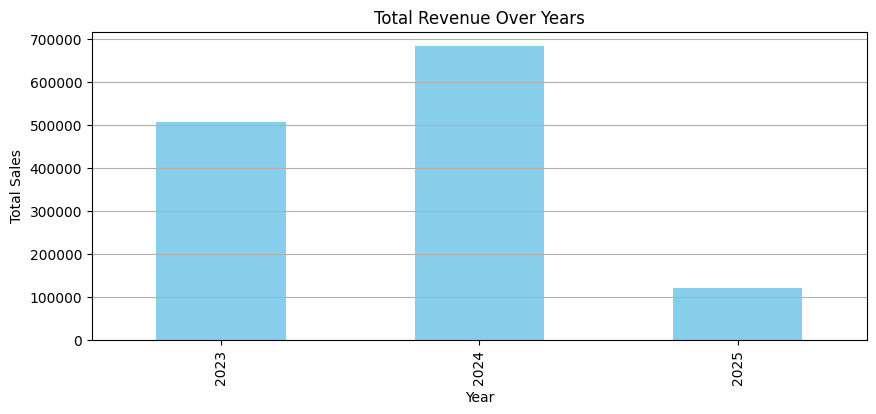

In [13]:
plt.figure(figsize=(10, 4))
sales_over_years.plot.bar(color='skyblue')
plt.title("Total Revenue Over Years")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.grid(True, axis='y')
plt.show()

In [33]:
#2)--Total Sales Over Months ??
df_filtered = df[df['Year'].isin([2023, 2024])]
monthly_sales = df_filtered.groupby(['Month', 'Year'])['Sales'].sum().unstack()
monthly_sales

Year,2023,2024
Month,,
1,NaN,49381.16
2,3757.85,64475.16
3,53639.57,56755.49
4,46128.56,47564.09
5,73794.70,37223.43
6,51881.04,76601.89
7,48609.97,56392.93
8,40363.91,55230.27
9,47837.95,62172.82


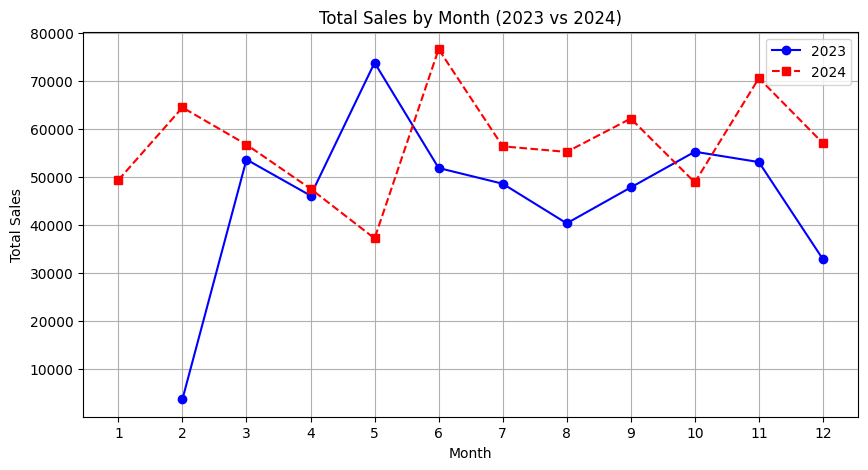

In [15]:
#Which months have the highest sales?
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales[2023], marker='o', linestyle='-', label='2023', color='b')
plt.plot(monthly_sales.index, monthly_sales[2024], marker='s', linestyle='--', label='2024', color='r')
plt.title("Total Sales by Month (2023 vs 2024)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))  # Ensure x-axis is from 1 to 12 for months
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# sales by product category :
df['Product_Category'].nunique()
product_cat_sales = df.groupby('Product_Category')['Sales'].sum().sort_values(ascending=False)
product_cat_sales

,Sales
Product_Category,
Laptop,282573.21
Smartwatch,280359.95
Mobile,254584.89
Headphones,251411.78
TV,240165.44


Text(0, 0.5, 'Product_Category')

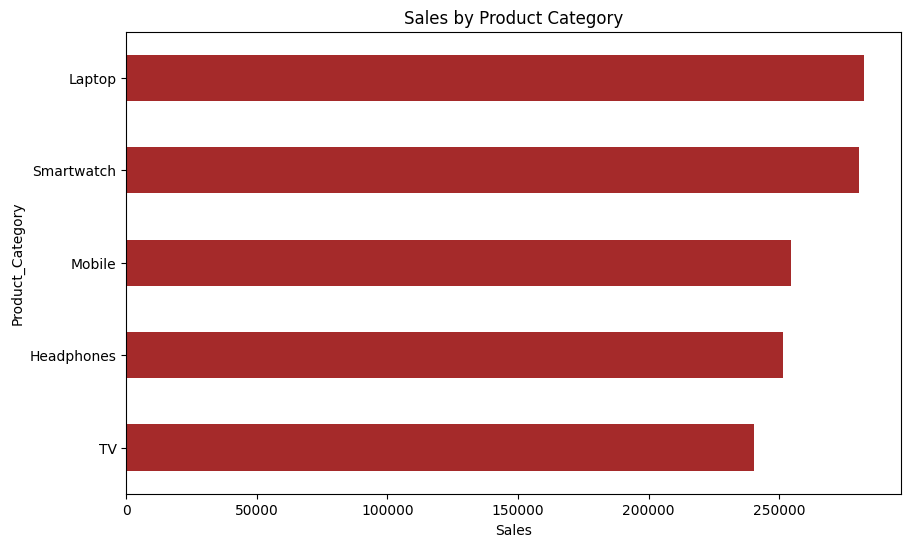

In [17]:
plt.figure(figsize=(10, 6))
product_cat_sales.plot(kind='barh', color='Brown')
plt.gca().invert_yaxis()  # نخلي الأعلى فوق
plt.title('Sales by Product Category')
plt.xlabel('Sales')
plt.ylabel('Product_Category')

In [18]:
#3)--Which products generate the most sales?
# here we can know top 10 or top 5 products
df['Product_Name'].nunique() #--15
product_sales = df.groupby('Product_Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
product_sales


,Product_Name,Sales
4,Garmin Forerunner,110915.36
14,iPhone 13,98321.87
8,MacBook Pro,96694.81
6,HP Spectre x360,94752.06
11,Samsung QLED,92706.02
3,Dell XPS 15,91126.34
10,Samsung Galaxy Watch 4,90308.15
2,Bose 700,85785.99
0,AirPods Pro,84436.47
5,Google Pixel 6,81796.82


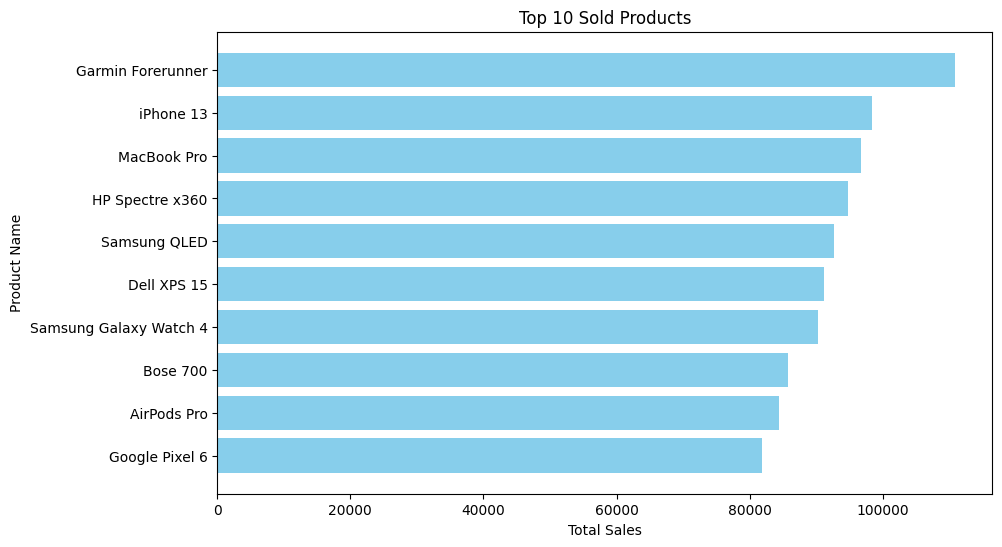

In [34]:
## Select top 10 products for visualization
top_10 = product_sales.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10['Product_Name'], top_10['Sales'], color='skyblue')
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 10 Sold Products")
plt.gca().invert_yaxis()  # Invert to show highest at the top
plt.show()

In [20]:
#4)--Which regions contribute the most to sales?
top_region = df.groupby('Region')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False)
top_region

,Region,Sales
4,South America,296674.18
3,North America,292328.91
2,Europe,249433.91
0,Africa,238540.41
1,Asia,232117.86


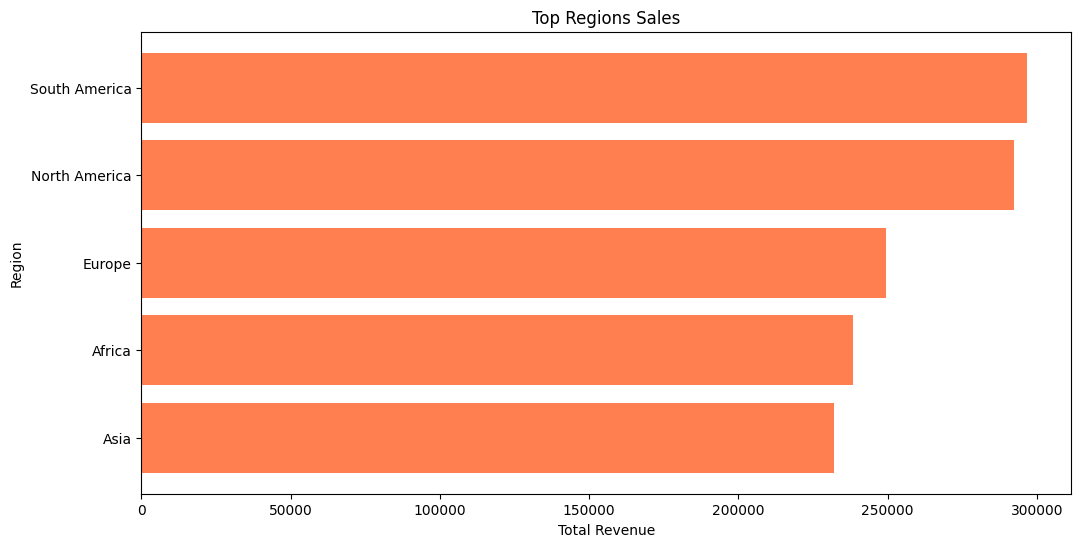

In [21]:
plt.figure(figsize=(12, 6))
plt.barh(top_region['Region'], top_region['Sales'], color = 'coral')
plt.xlabel('Total Revenue')
plt.ylabel('Region')
plt.title('Top Regions Sales')
plt.gca().invert_yaxis()
plt.show()

In [22]:
#5)--Analyze average purchase per customer by age group
bins = [0, 18, 25, 35, 45, 60, 100]
labels  = ['<18', '18-25', '26-35', '36-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Customer_Age'], bins=bins, labels =labels )
age_avg_sales = df.groupby('Age Group')['Sales'].mean()
# Average sales per age group
age_avg_sales


<ipython-input-22-2ef245d78bea>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_avg_sales = df.groupby('Age Group')['Sales'].mean()


,Sales
Age Group,
<18,1067.501538
18-25,1246.242623
26-35,1300.992684
36-45,1291.296879
46-60,1394.136696
60+,1289.488082


<ipython-input-35-b8c40118b03b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group')['Sales'].mean().plot(kind='bar', title='Avg Sales per Age Group')


<Axes: title={'center': 'Avg Sales per Age Group'}, xlabel='Age Group'>

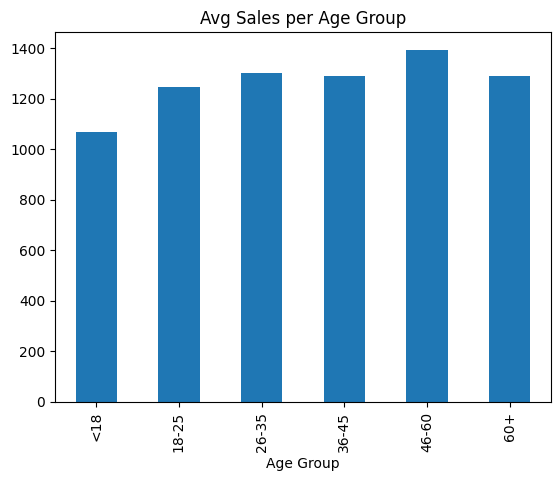

In [35]:
df.groupby('Age Group')['Sales'].mean().plot(kind='bar', title='Avg Sales per Age Group')

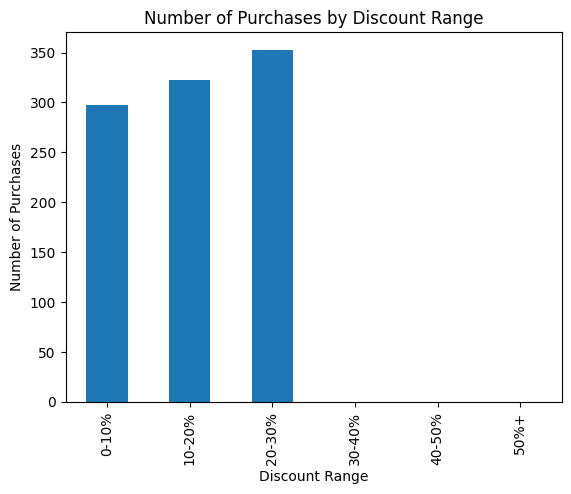

In [24]:
df['Discount_Percentage'] = pd.to_numeric(df['Discount_Percentage'], errors='coerce')
#6)--Discount Affect on Sales ??
discount_bins = [0, 10, 20, 30, 40, 50, 100]
discount_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
df['Discount Range'] = pd.cut(df['Discount_Percentage'], bins=discount_bins, labels=discount_labels)
discount_effect = df['Discount Range'].value_counts().sort_index()
discount_effect.plot(kind='bar', title='Number of Purchases by Discount Range')
plt.ylabel('Number of Purchases')
plt.xlabel('Discount Range')
plt.show()

In [25]:
#7)--average Discount Percntage for each category ??
discount_by_category = (df.groupby('Product_Category')['Discount_Percentage'].mean())#.sort_values(ascending=False))
discount_by_category

,Discount_Percentage
Product_Category,
Headphones,15.269351
Laptop,15.706745
Mobile,14.297094
Smartwatch,15.764174
TV,15.141436


Text(0, 0.5, 'Product Category')

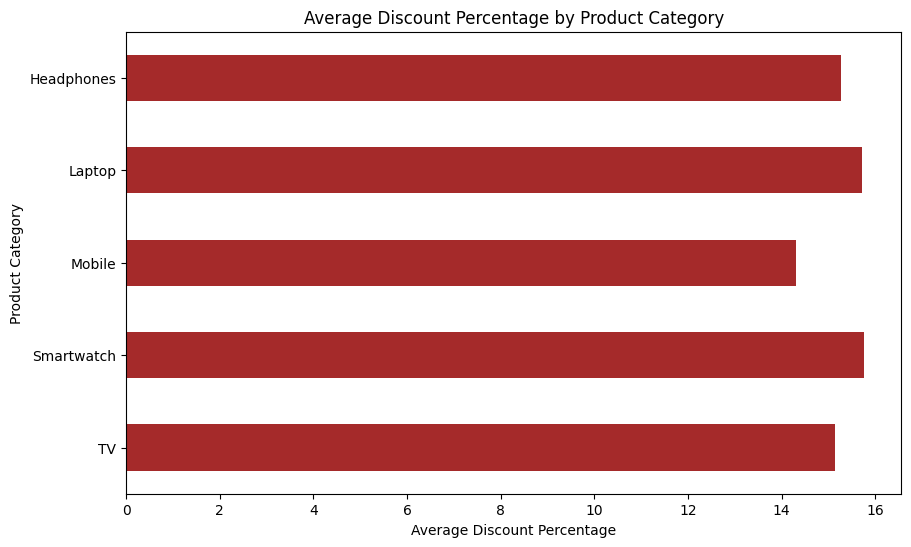

In [36]:
plt.figure(figsize=(10, 6))
discount_by_category.plot(kind='barh', color='Brown')
plt.gca().invert_yaxis()
plt.title('Average Discount Percentage by Product Category')
plt.xlabel('Average Discount Percentage')
plt.ylabel('Product Category')


In [27]:
#8)--top payment method used ??
top_payment_method = df.groupby('Payment_Method')['Transaction_ID'].count().sort_values(ascending=False)
top_payment_method

,Transaction_ID
Payment_Method,
Cash,263
Debit Card,256
Credit Card,248
PayPal,233


Text(0, 0.5, 'Payment Method')

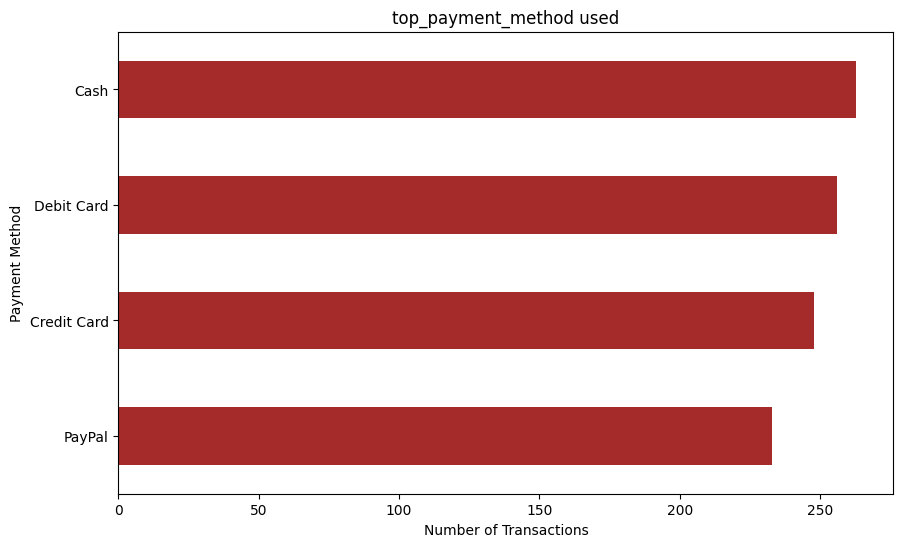

In [28]:
plt.figure(figsize=(10, 6))
top_payment_method.plot(kind='barh', color='Brown')
plt.gca().invert_yaxis()
plt.title('top_payment_method used')
plt.xlabel('Number of Transactions')
plt.ylabel('Payment Method')


In [29]:
df.head(5)

,Customer_ID,Transaction_ID,Product_Category,Product_Name,Quantity_Purchased,Purchase_Amount,Discount_Percentage,Sales,Purchase_Date,Payment_Method,Customer_Age,Customer_Gender,Region,Year,Month,Age Group,Discount Range
0,1,T00001,Headphones,Bose 700,1,1168.87,22.01,911.60,2024-03-19,Debit Card,64,Male,South America,2024,3,60+,20-30%
1,2,T00002,Headphones,AirPods Pro,8,659.06,4.12,631.91,2023-03-11,Credit Card,31,Male,North America,2023,3,26-35,0-10%
2,3,T00003,TV,LG OLED,8,1776.47,0.57,1766.34,2024-11-08,PayPal,26,Male,Asia,2024,11,26-35,0-10%
3,4,T00004,Smartwatch,Apple Watch Series 7,7,1877.17,29.35,1326.22,2023-09-08,Credit Card,26,Female,Europe,2023,9,26-35,20-30%
4,5,T00005,Headphones,Bose 700,3,2257.90,17.05,1872.93,2023-10-30,Credit Card,57,Male,Europe,2023,10,46-60,10-20%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


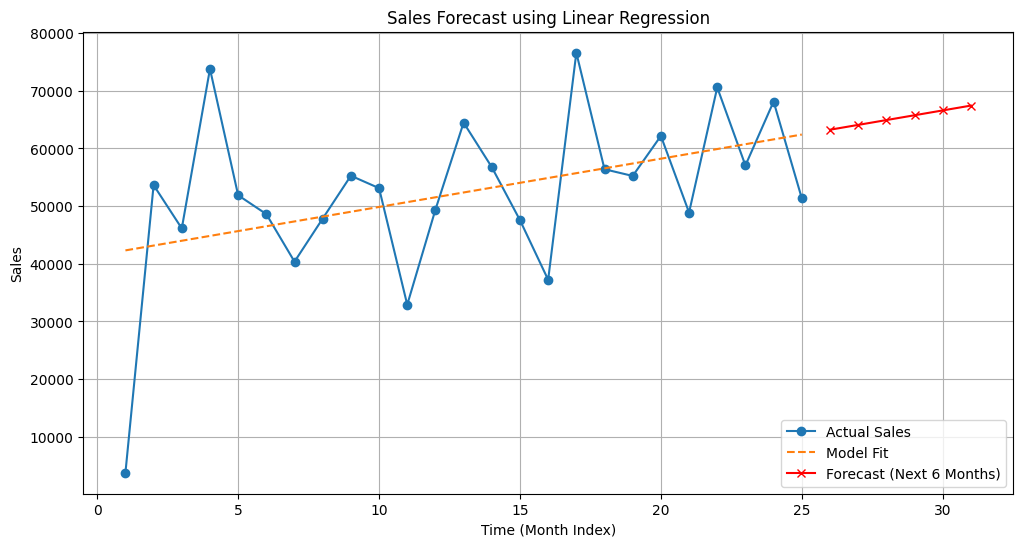

In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np

monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

monthly_sales['Time_Index'] = np.arange(len(monthly_sales)) + 1

X = monthly_sales[['Time_Index']]
y = monthly_sales['Sales']

model = LinearRegression()
model.fit(X, y)

monthly_sales['Predicted_Sales'] = model.predict(X)

future_months = 6
future_index = np.arange(X['Time_Index'].max() + 1, X['Time_Index'].max() + future_months + 1).reshape(-1, 1)
future_predictions = model.predict(future_index)

future_df = pd.DataFrame({
    'Time_Index': future_index.flatten(),
    'Predicted_Sales': future_predictions
})

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Time_Index'], monthly_sales['Sales'], label='Actual Sales', marker='o')
plt.plot(monthly_sales['Time_Index'], monthly_sales['Predicted_Sales'], label='Model Fit', linestyle='--')
plt.plot(future_df['Time_Index'], future_df['Predicted_Sales'], label='Forecast (Next 6 Months)', marker='x', color='red')
plt.title('Sales Forecast using Linear Regression')
plt.xlabel('Time (Month Index)')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()